In [3]:
import pandas as pd
import numpy as np
import plotly.express as px

In [5]:
smoking = pd.read_csv('/content/smoking.csv')

In [6]:
smoking.head()

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


In [7]:
pattern = r'(\d+(?:,\d+)?) to (\d+(?:,\d+)?)'

# Extracting min_salary and max_salary using regular expressions
smoking[['min_salary', 'max_salary']] = smoking['gross_income'].str.extract(pattern)

# Fill missing values with a default value (0 in this case)
smoking['min_salary'].fillna('0', inplace=True)
smoking['max_salary'].fillna('0', inplace=True)

# Converting to integers
smoking['min_salary'] = smoking['min_salary'].str.replace(',', '').astype(int)
smoking['max_salary'] = smoking['max_salary'].str.replace(',', '').astype(int)

# FEATURE ENGINEERING

### Converting Under to max_salary

In [8]:
val_under = smoking[smoking['gross_income'].str.startswith('Under')]['gross_income'].str.split(' ', expand=True)[1].str.replace(',', '').astype(int)

In [9]:
val_under = val_under.values

In [10]:
smoking.loc[(smoking['max_salary'] == 0) & (smoking['gross_income'].str.startswith('Under')), 'max_salary'] = val_under

In [ ]:
smoking

### Converting above to min_salary

In [11]:
val_above = smoking[smoking['gross_income'].str.startswith('Above')]['gross_income'].str.split(' ', expand=True)[1].str.replace(',', '').astype(int)
val_above = val_above.values
smoking.loc[(smoking['min_salary'] == 0) & (smoking['gross_income'].str.startswith('Above')), 'min_salary'] = val_above

In [12]:
smoking.head()

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type,min_salary,max_salary
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN,2600,5200
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets,0,2600
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN,28600,36400
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN,10400,15600
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN,2600,5200


# DATA CLEANING

In [13]:
smoking.isna().sum()

gender                      0
age                         0
marital_status              0
highest_qualification       0
nationality                 0
ethnicity                   0
gross_income                0
region                      0
smoke                       0
amt_weekends             1270
amt_weekdays             1270
type                     1270
min_salary                  0
max_salary                  0
dtype: int64

In [14]:
#smoking.fillna(0, inplace=True)

In [15]:
smoking.isna().sum()

gender                   0
age                      0
marital_status           0
highest_qualification    0
nationality              0
ethnicity                0
gross_income             0
region                   0
smoke                    0
amt_weekends             0
amt_weekdays             0
type                     0
min_salary               0
max_salary               0
dtype: int64

In [16]:
smoking = smoking.drop(columns = ['gross_income','amt_weekends', 'amt_weekdays', 'type'])

In [17]:
# prompt: Using dataframe smoking: make the column 'smoke' the last column

smoking_cols = list(smoking.columns)
smoking_cols.remove('smoke')
smoking_cols.append('smoke')
smoking = smoking[smoking_cols]


In [18]:
smoking

,gender,age,marital_status,highest_qualification,nationality,ethnicity,region,min_salary,max_salary,smoke
0,Male,38,Divorced,No Qualification,British,White,The North,2600,5200,No
1,Female,42,Single,No Qualification,British,White,The North,0,2600,Yes
2,Male,40,Married,Degree,English,White,The North,28600,36400,No
3,Female,40,Married,Degree,English,White,The North,10400,15600,No
4,Female,39,Married,GCSE/O Level,British,White,The North,2600,5200,No
...,...,...,...,...,...,...,...,...,...,...
1686,Male,22,Single,No Qualification,Scottish,White,Scotland,2600,5200,No
1687,Female,49,Divorced,Other/Sub Degree,English,White,Scotland,2600,5200,Yes
1688,Male,45,Married,Other/Sub Degree,Scottish,White,Scotland,5200,10400,No
1689,Female,51,Married,No Qualification,English,White,Scotland,2600,5200,Yes


In [22]:
 smoking['avg_salary'] = smoking[['min_salary', 'max_salary']].mean(axis=1)

In [24]:
smoking_cols = list(smoking.columns)
smoking_cols.remove('smoke')
smoking_cols.append('smoke')
smoking = smoking[smoking_cols]


In [26]:
#smoking.drop(columns = ['min_salary', 'max_salary'], inplace = True)

<ipython-input-26-0e791457b54e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smoking.drop(columns = ['min_salary', 'max_salary'], inplace = True)


In [27]:
smoking

,gender,age,marital_status,highest_qualification,nationality,ethnicity,region,avg_salary,smoke
0,Male,38,Divorced,No Qualification,British,White,The North,3900.0,No
1,Female,42,Single,No Qualification,British,White,The North,1300.0,Yes
2,Male,40,Married,Degree,English,White,The North,32500.0,No
3,Female,40,Married,Degree,English,White,The North,13000.0,No
4,Female,39,Married,GCSE/O Level,British,White,The North,3900.0,No
...,...,...,...,...,...,...,...,...,...
1686,Male,22,Single,No Qualification,Scottish,White,Scotland,3900.0,No
1687,Female,49,Divorced,Other/Sub Degree,English,White,Scotland,3900.0,Yes
1688,Male,45,Married,Other/Sub Degree,Scottish,White,Scotland,7800.0,No
1689,Female,51,Married,No Qualification,English,White,Scotland,3900.0,Yes


In [28]:
pd.to_csv(smoking, 'smoking_cleaned.csv')

AttributeError: module 'pandas' has no attribute 'to_csv'

In [29]:
#smoking.to_csv('smoking_cleaned.csv', index=False)

# EDA

## Univariate Analysis

### Gender

In [15]:
smoking['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [20]:
smoking['gender'].value_counts()

Female    965
Male      726
Name: gender, dtype: int64

In [21]:
px.pie(smoking, names='gender')

### Age

In [41]:
px.box(smoking, x='age')

<Axes: ylabel='Density'>

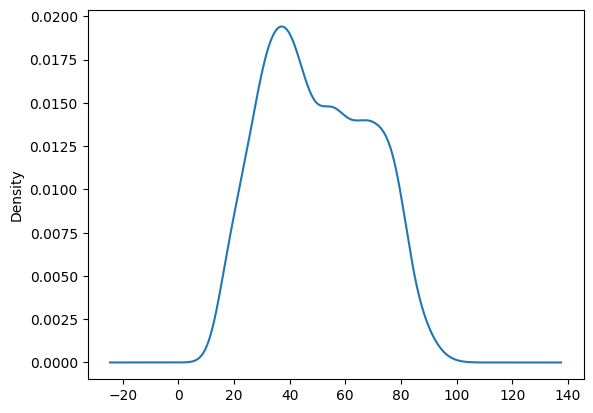

In [43]:
smoking['age'].plot(kind = 'kde')

In [27]:
smoking['age'].value_counts()

40    43
34    40
31    38
42    37
33    36
      ..
90     3
91     2
93     2
95     1
97     1
Name: age, Length: 79, dtype: int64

In [35]:
px.histogram(smoking, x='age', marginal='box')

### Marital Status

In [38]:
smoking['marital_status'].value_counts()

Married      812
Single       427
Widowed      223
Divorced     161
Separated     68
Name: marital_status, dtype: int64

In [47]:
px.pie(smoking, names='marital_status', title='Marital Status')

### highest_qualification

In [50]:
smoking['highest_qualification'].value_counts()

No Qualification     586
GCSE/O Level         308
Degree               262
Other/Sub Degree     127
Higher/Sub Degree    125
A Levels             105
GCSE/CSE             102
ONC/BTEC              76
Name: highest_qualification, dtype: int64

In [51]:
px.pie(smoking, names='highest_qualification', title='Highest Qualification')

### Nationality

In [192]:
# prompt: plot univariate plots for ' nationality' column

# # Univariate Analysis
# ### Nationality
smoking['nationality'].value_counts()
px.pie(smoking, names='nationality', title='Nationality')



In [193]:
px.histogram(smoking, x='nationality')

### Ethnicity

In [195]:
px.pie(smoking, names='ethnicity', title='Ethnicity')

In [196]:
px.histogram(smoking, x='ethnicity')

### Region

In [197]:
px.pie(smoking, names='region', title='Region')

In [198]:
px.histogram(smoking, x='region')

### Min_Salary

In [199]:
smoking['min_salary'].skew()

1.189631786389787

In [200]:
px.histogram(smoking, x="min_salary")

<Axes: ylabel='Density'>

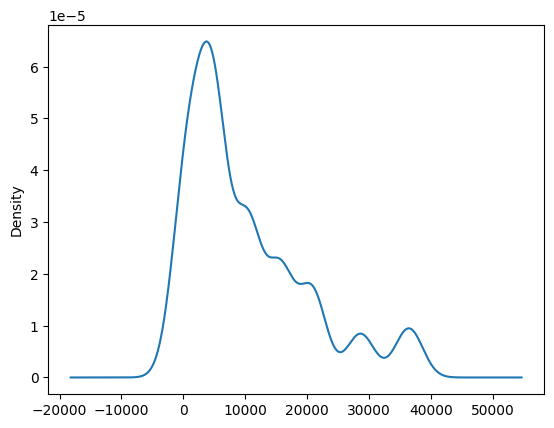

In [201]:
smoking['min_salary'].plot(kind='kde')

In [202]:
px.box(smoking, 'min_salary')

### Max_Salary

In [203]:
smoking['min_salary'].skew()

1.189631786389787

In [204]:
px.histogram(smoking, x="max_salary")

<Axes: ylabel='Density'>

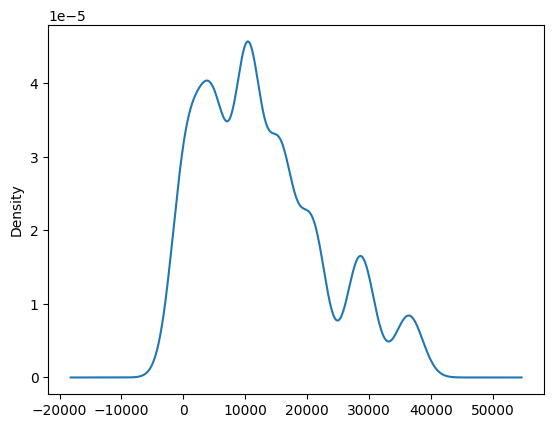

In [205]:
smoking['max_salary'].plot(kind='kde')

In [206]:
px.box(smoking, 'max_salary')

In [208]:
#smoking.to_csv('smoking_cleaned.csv', index=False)

In [210]:
smoking

,gender,age,marital_status,highest_qualification,nationality,ethnicity,region,min_salary,max_salary,smoke
0,Male,38,Divorced,No Qualification,British,White,The North,2600,5200,No
1,Female,42,Single,No Qualification,British,White,The North,0,2600,Yes
2,Male,40,Married,Degree,English,White,The North,28600,36400,No
3,Female,40,Married,Degree,English,White,The North,10400,15600,No
4,Female,39,Married,GCSE/O Level,British,White,The North,2600,5200,No
...,...,...,...,...,...,...,...,...,...,...
1686,Male,22,Single,No Qualification,Scottish,White,Scotland,2600,5200,No
1687,Female,49,Divorced,Other/Sub Degree,English,White,Scotland,2600,5200,Yes
1688,Male,45,Married,Other/Sub Degree,Scottish,White,Scotland,5200,10400,No
1689,Female,51,Married,No Qualification,English,White,Scotland,2600,5200,Yes


<ipython-input-222-dff230c728d7>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




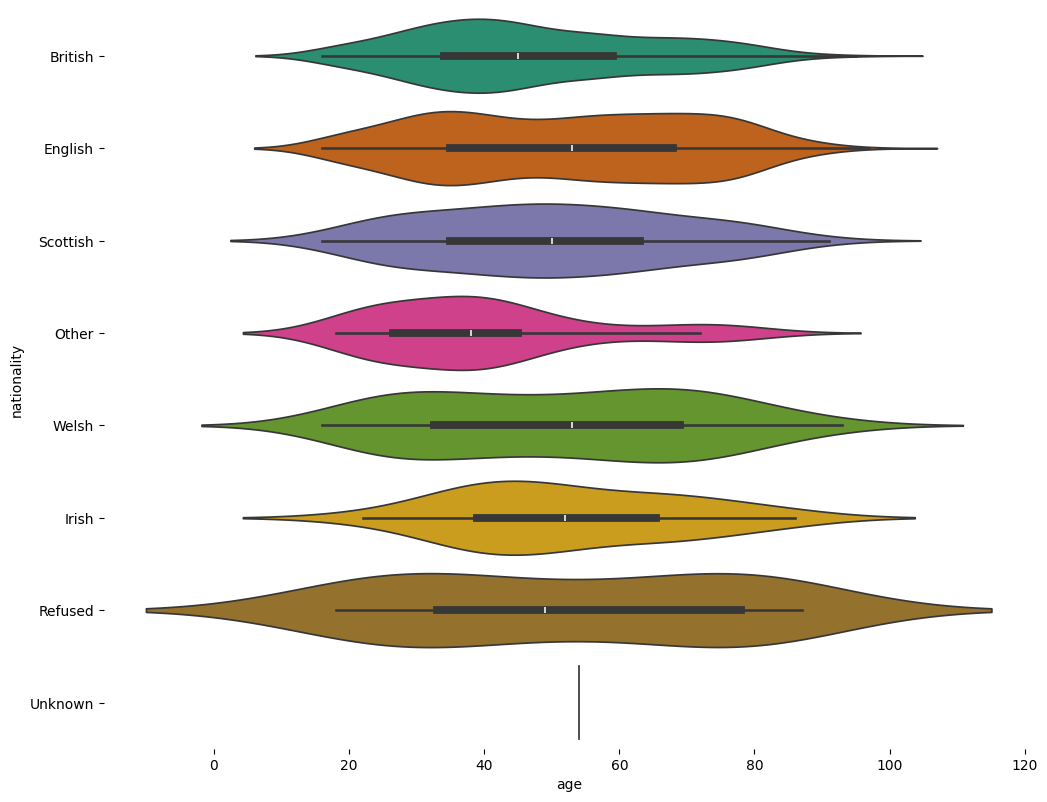

In [222]:
# @title nationality vs age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(smoking['nationality'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(smoking, x='age', y='nationality', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-221-ccb7e6c6abf0>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




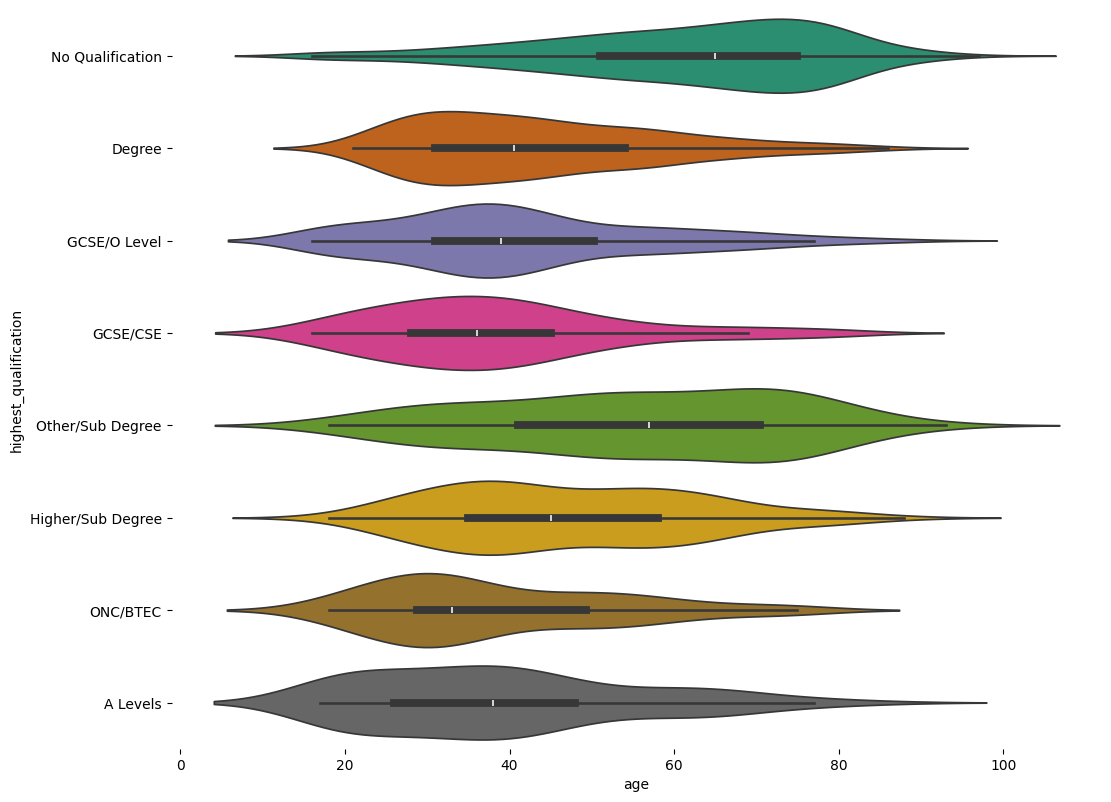

In [221]:
# @title highest_qualification vs age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(smoking['highest_qualification'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(smoking, x='age', y='highest_qualification', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-220-371b57afab41>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




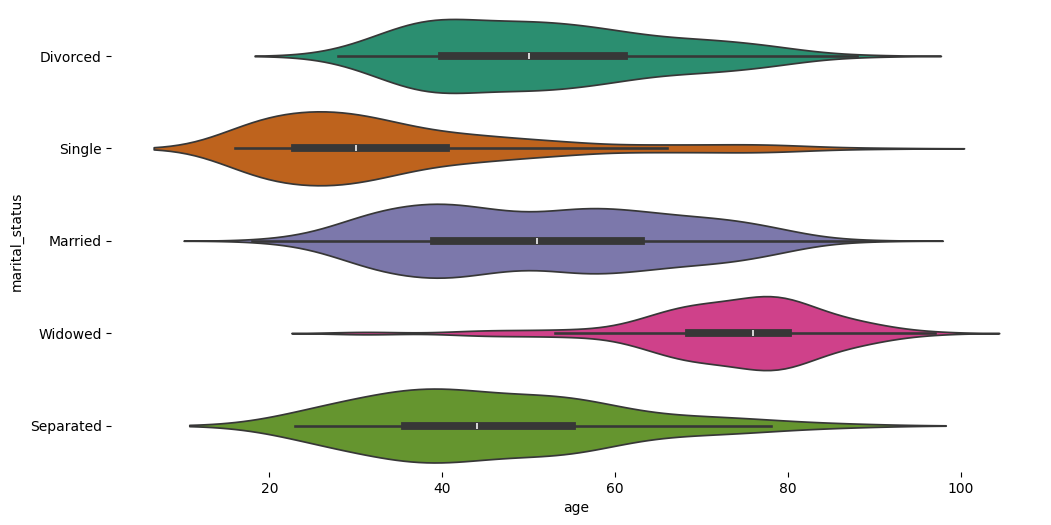

In [220]:
# @title marital_status vs age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(smoking['marital_status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(smoking, x='age', y='marital_status', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-219-026749930568>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




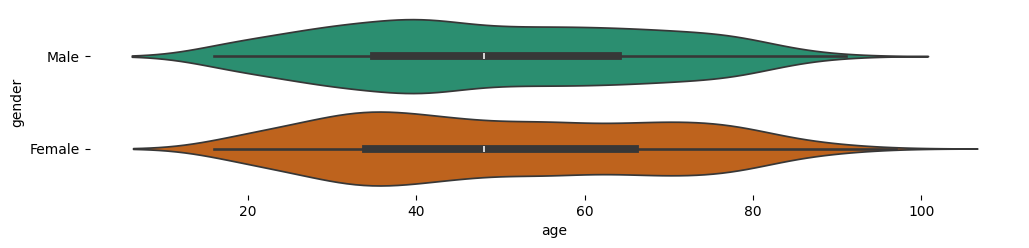

In [219]:
# @title gender vs age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(smoking['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(smoking, x='age', y='gender', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

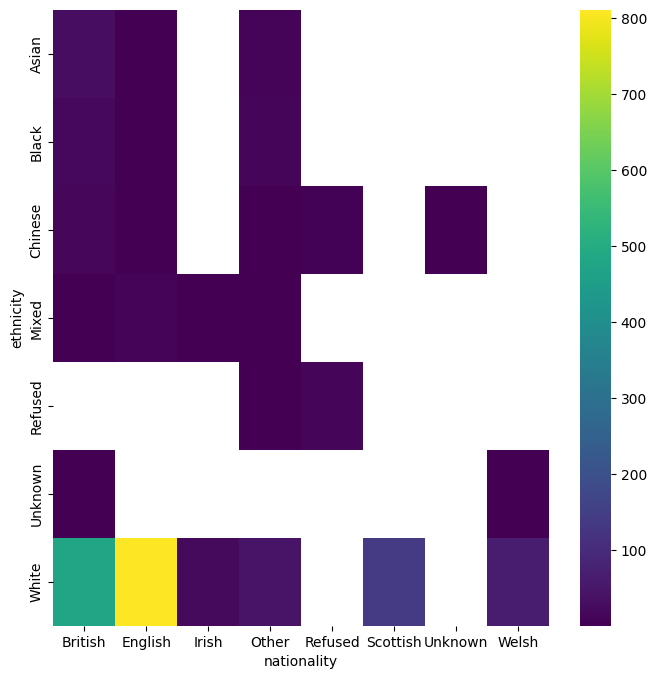

In [218]:
# @title nationality vs ethnicity

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ethnicity'].value_counts()
    for x_label, grp in smoking.groupby('nationality')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('nationality')
_ = plt.ylabel('ethnicity')

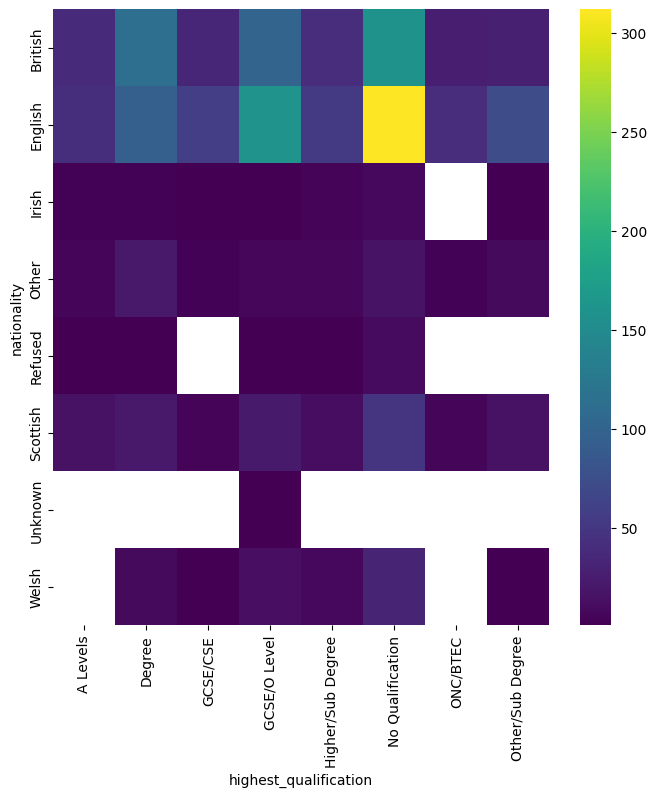

In [217]:
# @title highest_qualification vs nationality

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['nationality'].value_counts()
    for x_label, grp in smoking.groupby('highest_qualification')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('highest_qualification')
_ = plt.ylabel('nationality')

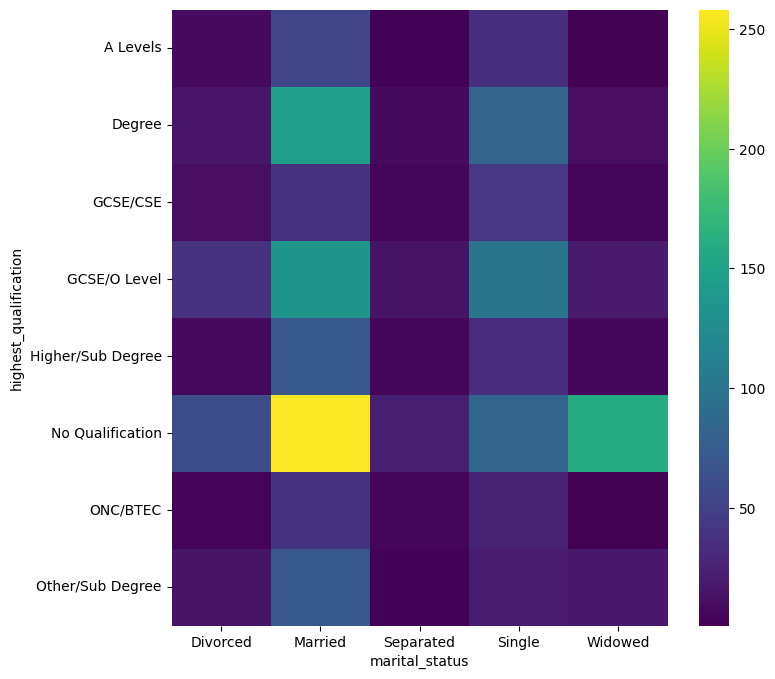

In [216]:
# @title marital_status vs highest_qualification

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['highest_qualification'].value_counts()
    for x_label, grp in smoking.groupby('marital_status')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('marital_status')
_ = plt.ylabel('highest_qualification')

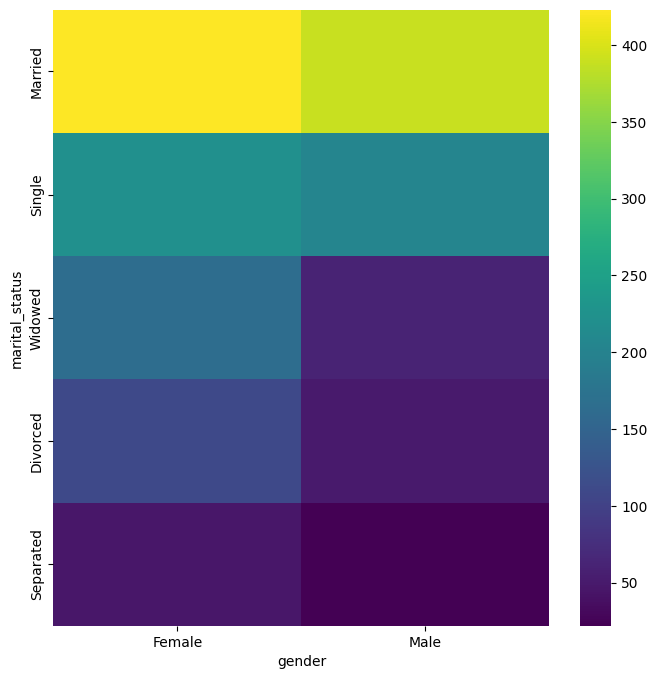

In [215]:
# @title gender vs marital_status

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['marital_status'].value_counts()
    for x_label, grp in smoking.groupby('gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('gender')
_ = plt.ylabel('marital_status')

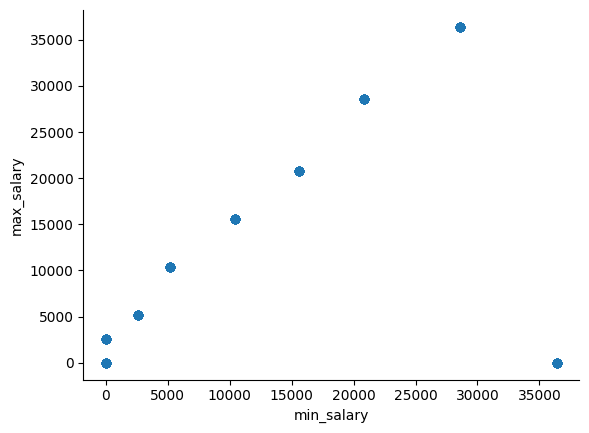

In [214]:
# @title min_salary vs max_salary

from matplotlib import pyplot as plt
smoking.plot(kind='scatter', x='min_salary', y='max_salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

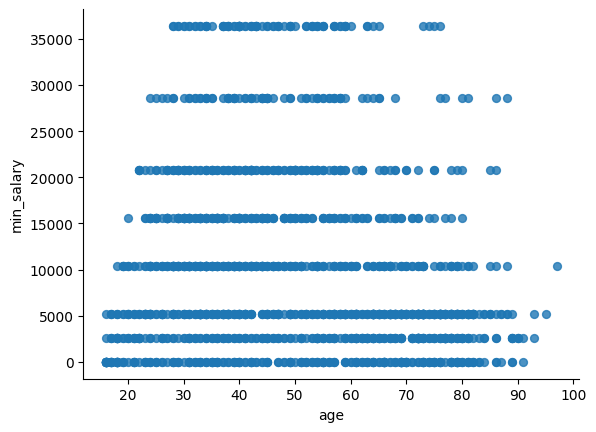

In [213]:
# @title age vs min_salary

from matplotlib import pyplot as plt
smoking.plot(kind='scatter', x='age', y='min_salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [223]:
smoking


,gender,age,marital_status,highest_qualification,nationality,ethnicity,region,min_salary,max_salary,smoke
0,Male,38,Divorced,No Qualification,British,White,The North,2600,5200,No
1,Female,42,Single,No Qualification,British,White,The North,0,2600,Yes
2,Male,40,Married,Degree,English,White,The North,28600,36400,No
3,Female,40,Married,Degree,English,White,The North,10400,15600,No
4,Female,39,Married,GCSE/O Level,British,White,The North,2600,5200,No
...,...,...,...,...,...,...,...,...,...,...
1686,Male,22,Single,No Qualification,Scottish,White,Scotland,2600,5200,No
1687,Female,49,Divorced,Other/Sub Degree,English,White,Scotland,2600,5200,Yes
1688,Male,45,Married,Other/Sub Degree,Scottish,White,Scotland,5200,10400,No
1689,Female,51,Married,No Qualification,English,White,Scotland,2600,5200,Yes
